# Linear Regression

This IPython Notebook discusses about Linear Regression from Assumptions to evaluation of Linear Regression.

Basic Linear Regression Assumption

Y = βo + β1X + ∈

Y ---> Independent Variable
X ---> Dependent Variable
βo---> Intercept in mathematical terms & Bais in Machine Learning Language
β1---> Slope of the Regression line
∈ ---> Residual error of predicted value and actual value.

Error is an inevitable part of the prediction-making process. No matter how powerful the algorithm we choose, there will always remain an (∈) irreducible error which reminds us that the "future is uncertain."

#  Ordinary Least Square Methods

OLS is a method used by linear/multiple regression model in finding the best coefficient values of βo, β1 etc. 
OLS technique tries to reduce the sum of squared errors ∑[Actual(y) - Predicted(y')]² 

Why OLS?
1) It uses squared error which has nice mathematical properties, thereby making it easier to differentiate and compute gradient descent.
2) OLS is easy to analyze and computationally faster, i.e. it can be quickly applied to data sets having 1000s of features.
3) Interpretation of OLS is much easier than other regression techniques.

In OLS, the error estimates can be divided into three parts:

1) Residual Sum of Squares (RSS) - ∑[Actual(y) - Predicted(y)]²

2) Explained Sum of Squares (ESS) - ∑[Predicted(y) - Mean(ymean)]²

3) Total Sum of Squares (TSS) - ∑[Actual(y) - Mean(ymean)]²

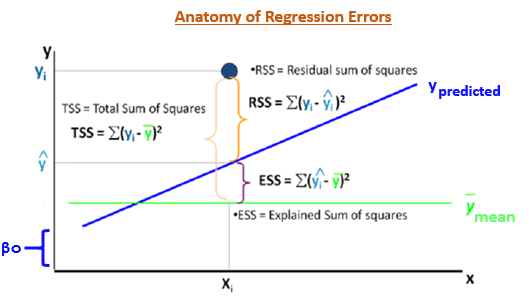

The main application of the above error terms is, they are used to calculate Coeffecient of Determination (R²).
                
 `R² = 1 - (SSE/TSS)`

# Calculating the coeffecient values  using general maths
  β1 = Σ(xi - xmean)(yi-ymean)/ Σ (xi - xmean)² where i= 1 to n (no. of obs.)

  βo = ymean - β1(xmean)

# Assumptions of Linear Regression Algorithm


1) LINEAR ASSUMPTION : There exists an 'Linear'  and 'additive' relationship between Dependent variabel (DV) and Independent Variable (IV). (Dependent variable should be a linear combination of Independent variable)
additive here referes to the relation between X and Y irrespective to other variables.

Correlation:- A measure of strength of linear relationship  between two variables
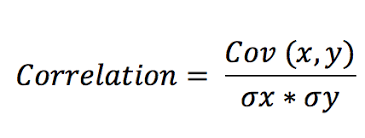
Covariance :- Average of the product of deviation of each variable from its mean, this parameter explains how two variables move togeather.
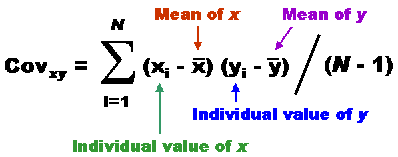

How to validate our assumption? 
The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all.
One can use the corr() function on the Pandas DataFrame to calculate a correlation matrix. 
Example : correlations = data.corr(method='pearson')
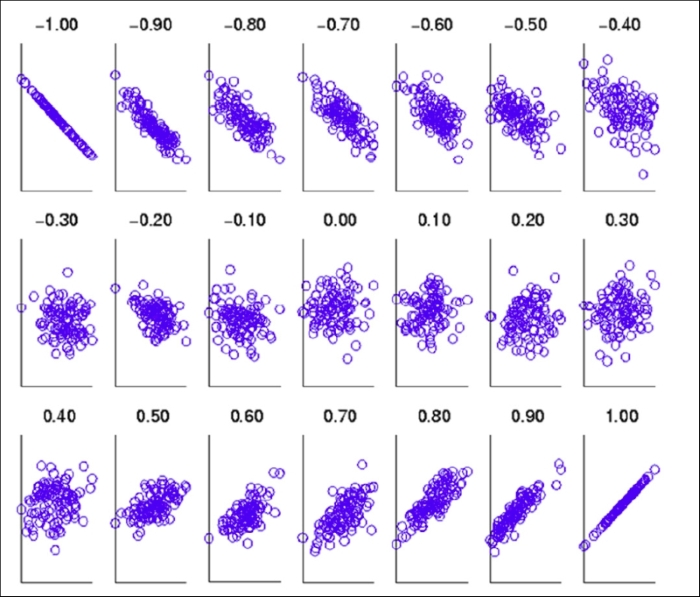


2) There must be no correlation among independent variables. Presence of correlation in independent variables lead to Multicollinearity. If variables are correlated, it becomes extremely difficult for the model to determine the true effect of IVs on DV.

# MULTICOLLINEARITY 
Multicollinearity is a case where independent variables are highly correlated.
Multicollinearity can be tested using the following ways.

a) Correlation matrix – when computing the matrix of Pearson’s Bivariate Correlation among all independent variables the correlation coefficients need to be smaller than 1.

b) Tolerance – the tolerance measures the influence of one independent variable on all other independent variables; the tolerance is calculated with an initial linear regression analysis.  Tolerance is defined as T = 1 – R² for these first step regression analysis.  With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.

c) Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables.



# HOMOSKEDESTACITY
Homoskedestacity refers to the circumstance in which DV's variability is equal across values of an IV


# HETROSKEDESTACITY
3) The error terms must possess constant variance. Absence of constant variance leads to heteroskedestacity. (Error terms should be homosedastic).
Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it.A scatterplot of these variables will often create a cone-like shape, as the scatter (or variability) of the dependent variable (DV) widens or narrows as the value of the independent variable (IV) increases

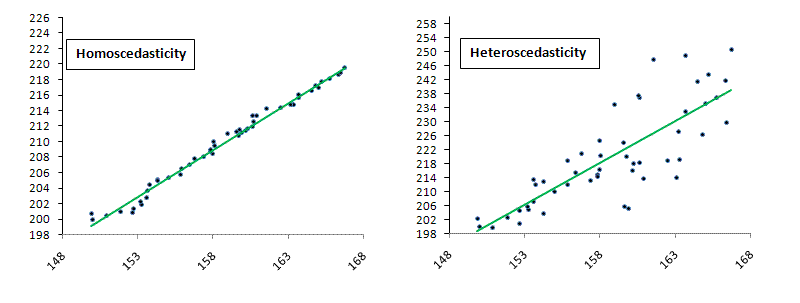
# AUTOCORRELATION

4) The error terms must be uncorrelated i.e. error at '∈t' must not indicate the at error at '∈t+1'. Presence of correlation in error terms is known as Autocorrelation. It drastically affects the regression coefficients and standard error values since they are based on the assumption of uncorrelated error terms. (No auto correlation in error terms)


you can test the linear regression model for autocorrelation with the Durbin-Watson test.  Durbin-Watson’s d tests the null hypothesis that the residuals are not linearly auto-correlated.  While d can assume values between 0 and 4, values around 2 indicate no autocorrelation.  As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data. However, the Durbin-Watson test only analyses linear autocorrelation and only between direct neighbors, which are first order effects.


5)The dependent variable and the error terms must possess a normal distribution. (Error's / Residuals should have a zero mean and be normally distributed.




In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the dataset
df = pd.read_csv("C://Users/bmitt\Desktop\Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


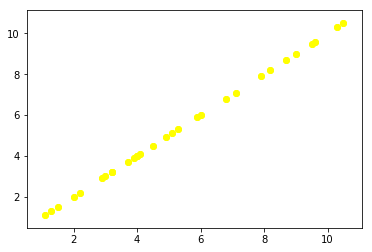

In [28]:
#Splitting the variables into X and y
X = df.iloc[: , :-1].values
y = df.iloc[: , :1].values

plt.scatter(X, y , color = 'yellow')
plt.show()

#Splitting the dataset into Test and Train data set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [20]:
# Training a model or fitting the regresssor
from sklearn.linear_model import LinearRegression 
regressor  = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
#Predicting the Salaries from test data
y_pred  = regressor.predict(X_test)

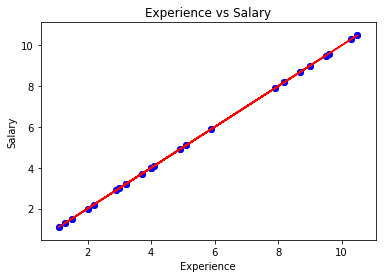

In [25]:
#Visualizing the model fitting
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

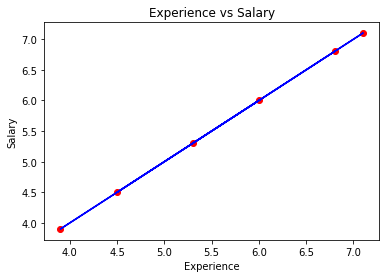

[[ 1.]]


In [32]:
#Visualizing the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

print(regressor.coef_)

# What is R^2 value?

R-squared is a statistical measure of how close the data points are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. The proportion of variance of the dependent variable that can be predictable from the dependent variable. 

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. 

# what is adjusted R^2 value?
The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.



# Effect of an Unsignificant variable on R^2 and adjusted R^2 values.

The value of R^2 value increases when you add an unsignificant variable to a model
The value of adjusted R^2 value decreases when we add an unsignificant variable to the model.


# How do we evaluate a regression model ?
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
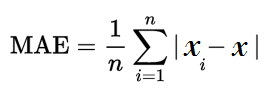

 
Mean Squared Error (MSE) is the mean of the squared errors:
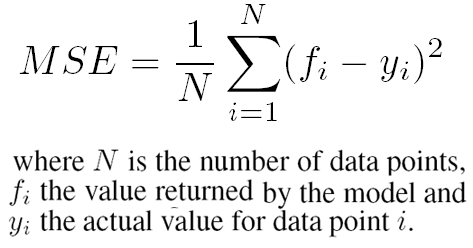
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
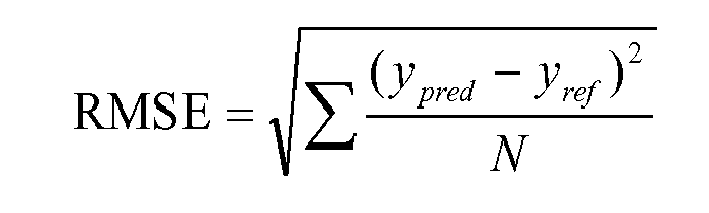


# What is F1-Score
F1-score is one of the evaluation metrics used to evaluate the perfomance of a classification model. F1-score is calculated using Precision and Recall.
p is the number of correct positive results divided by the number of all positive results returned by the classifier.
r is the number of correct positive results divided by the number of all relevant samples 
F1-score is the harmonic mean of P and r
F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.




# what is a P-value ? 

The p-value is the probability of obtaining a result as extreme as, or more extreme than, the result actually obtained when the null hypothesis is true. P value is a statistical measure that helps scientists determine whether or not their hypotheses are correct. P values are used to determine whether the results of their experiment are within the normal range of values for the events being observed. Usually, if the P value of a data set is below a certain pre-determined amount (like, for instance, 0.05), scientists will reject the "null hypothesis" of their experiment - in other words, they'll rule out the hypothesis that the variables of their experiment had no meaningful effect on the results.

# what is Significance level ?

-->Significance level is a measure of how certain we want to be about our results.
-->low significance values correspond to a low probability that the experimental results happened by chance and vice versa.
-->Significance levels are written as a decimal (such as 0.01), which corresponds to the percent chance that random sampling would produce a difference as large as the one you observed if there was no underlying difference in the populations.
-->By convention, scientists usually set the significance value for their experiments at 0.05, or 5 percent.[3] This means that experimental.
results that meet this significance level have, at most, a 5% chance of being reproduced in a random sampling process. For most experiments, generating results that are that unlikely to be produced by a random sampling process is seen as "successfully" showing a correlation between the change in the experimental variable and the observed effect.


# what is Hypothesis testing ?

A Hypothesis testing is an assment of how reasonable our observed data are assuming the null hypothesis is true.

# HYPOTHESIS 
A hypothesis is an assumption about a particular situation of the world that can be testable

pipeline of Hypothesis testing

Step1 : Stating the Null Hypothesis clearly
Step2 : Define your Test Statistic
Step3 : Generate many sets of simulated data assuming the null hypothesis is true
Step4 : Compute the test statistic for each  simulated data set.
Step5 : Generate P-value , P-value is the fraction of your simulated data sets for which the test statistis is as extreme as for the real data set.

